In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import plotly.express as px

sns.set_style('darkgrid')
mpl.rcParams['font.size']=14

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.shape

(32581, 12)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [157]:
df['loan_percent_income'] = df['loan_percent_income'] * 100

In [158]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,17.020349,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,10.678176,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,9.000000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,15.000000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,23.000000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,83.000000,30.000000


In [159]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [160]:
df.loan_status.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

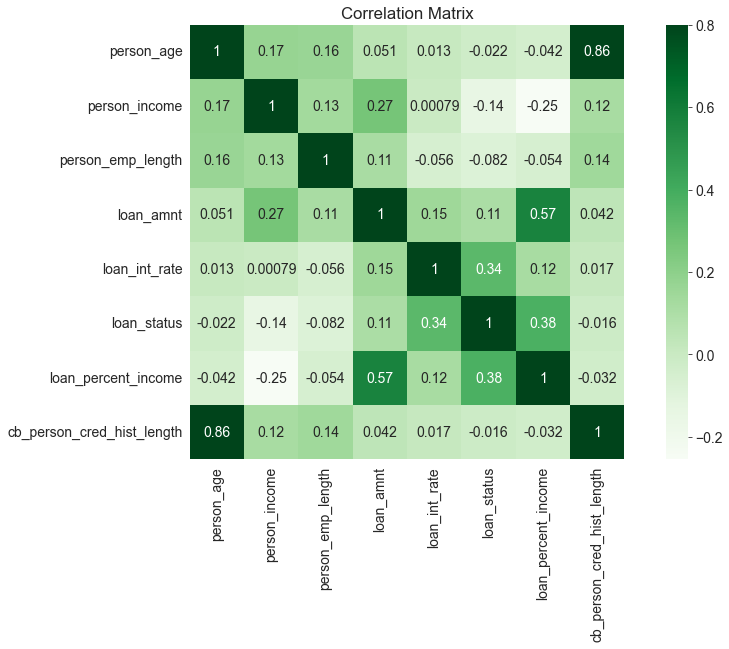

In [161]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

In [162]:
level_counts = df.person_home_ownership.value_counts()
fig = px.pie(values = level_counts.values, 
            names = level_counts.index, 
            color_discrete_sequence=px.colors.sequential.Mint,
            title='person home ownership')
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                 marker=dict(line=dict(color='#102000', width=0.2)))
fig.show()

In [163]:
level_counts = df.loan_grade.value_counts()
fig = px.pie(values = level_counts.values, 
            names = level_counts.index, 
            color_discrete_sequence=px.colors.sequential.Mint,
            title='loan_grade')
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                 marker=dict(line=dict(color='#102000', width=0.2)))
fig.show()

In [164]:
loan_intent_count = df.loan_intent.value_counts()
# plt.rcParams['figure.figsize'] = (15, 8)
# sns.barplot(loan_intent_count.index, loan_intent_count.values)

fig = px.bar(loan_intent_count, x=loan_intent_count.index, 
             y=loan_intent_count.values,
            title='Loan Intent',
            text_auto='.2f',
            labels={'index': 'intent', 'y': 'number of intent'})

fig.show()

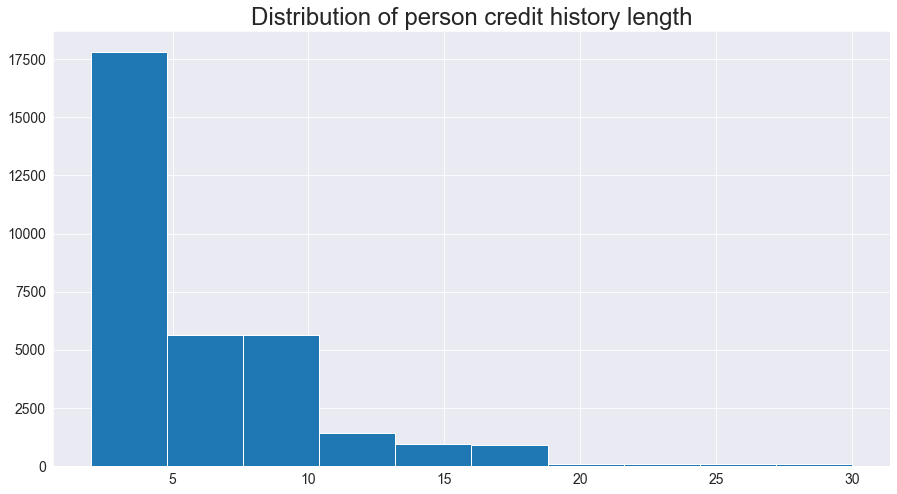

In [165]:
plt.rcParams['figure.figsize']=(15,8)
plt.hist(df['cb_person_cred_hist_length'])
plt.title('Distribution of person credit history length', fontsize=24)
plt.show()

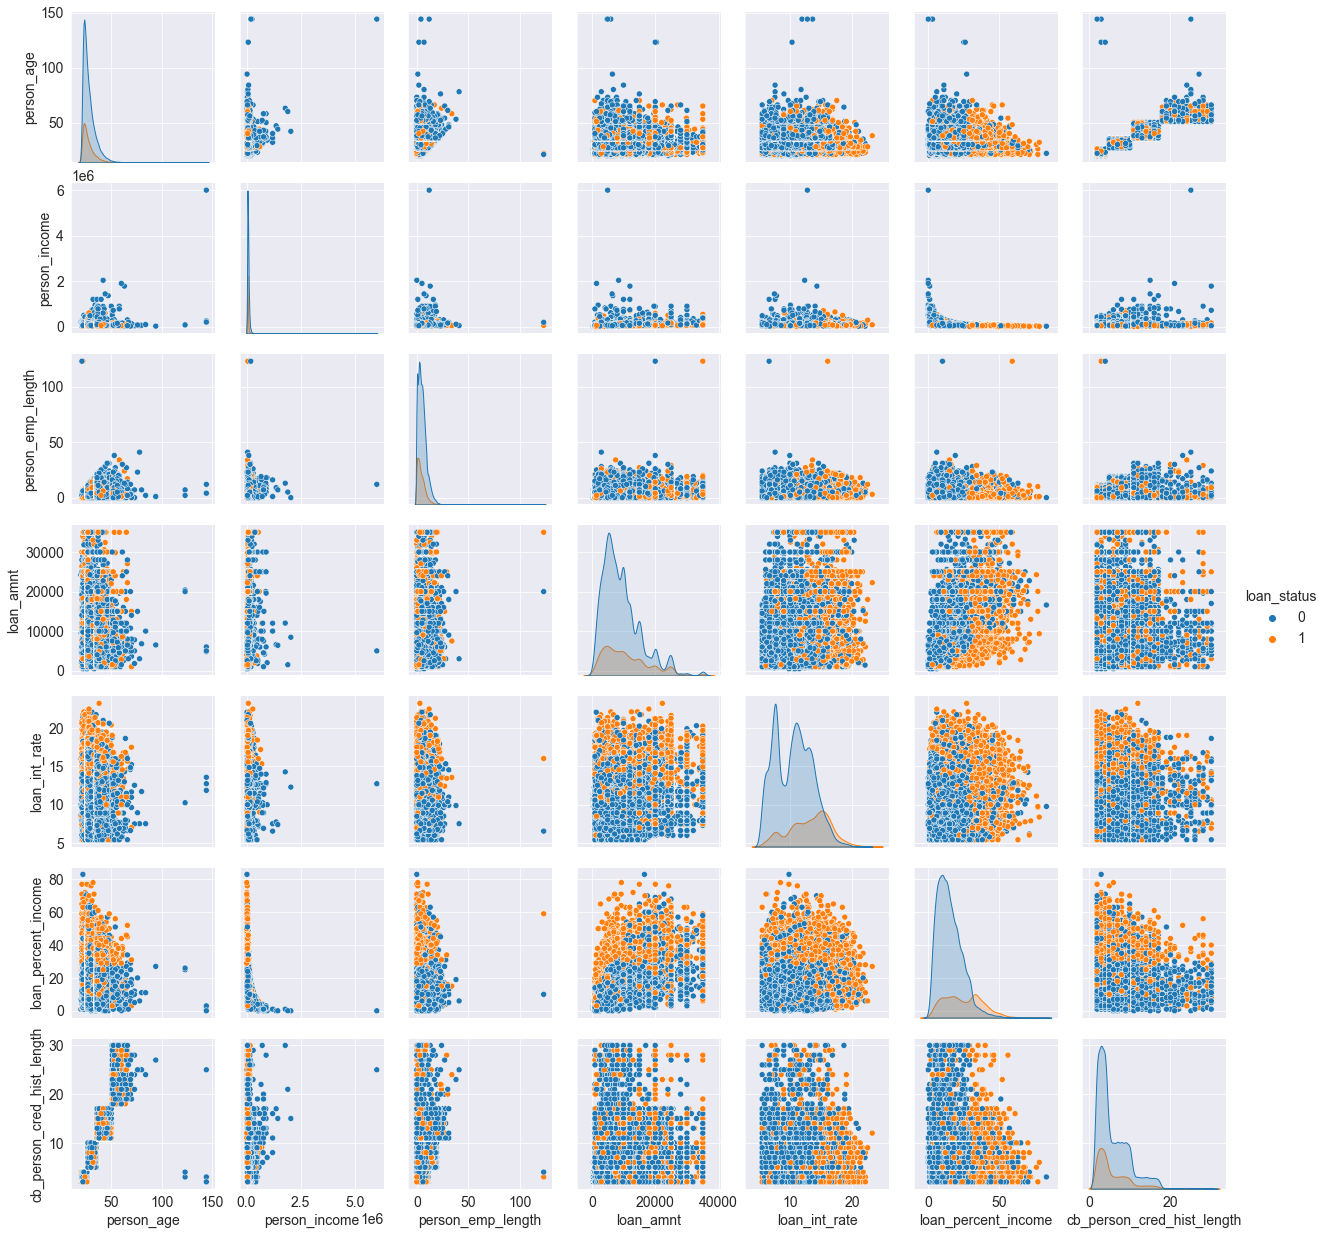

In [13]:
sns.pairplot(df, hue='loan_status')

### Dealing with error data

In [166]:
df.dropna(axis=0, inplace=True)

In [167]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [168]:
df.loan_status.value_counts()

0    22435
1     6203
Name: loan_status, dtype: int64

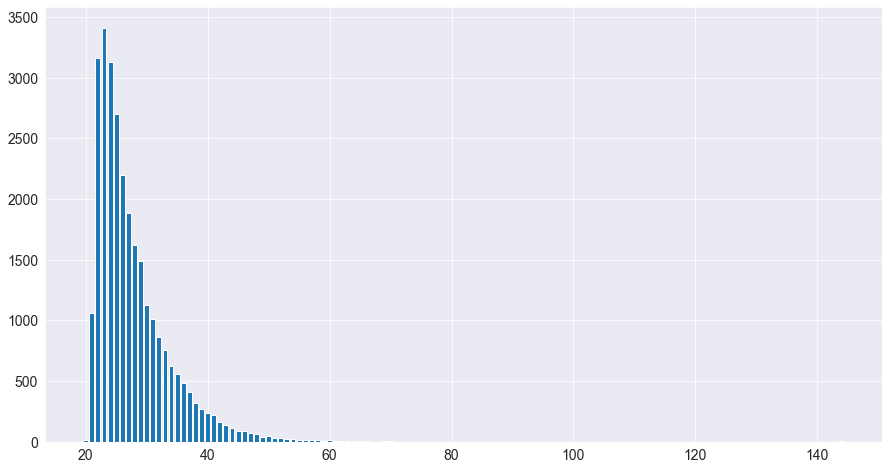

In [169]:
x= df.person_age.value_counts().index
y= df.person_age.value_counts().values
fig=plt.figure(figsize=(15,8))
plt.bar(x, y)
plt.show()

In [170]:
(y>80).sum()

26

In [171]:
df.reset_index(inplace=True)

In [172]:
# drop customer has age > 80
df.drop(df[df['person_age']>80].index, axis=0, inplace=True)

### Feature Engineering

In [173]:
df['age_group'] = pd.cut(df['person_age'],
                        bins=[20, 30, 45, 55, 65,80],
                        labels=['20-30','31-45', '46-55', '56-65', '>65'])

In [174]:
df.age_group.value_counts()

20-30    21798
31-45     6260
46-55      444
56-65       93
>65         24
Name: age_group, dtype: int64

In [175]:
df['income_group'] = pd.cut(df['person_income'],
                           bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                           labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [176]:
df['income_group'].value_counts()

low-middle     10198
middle          8532
high-middle     4197
high            3734
low             1972
Name: income_group, dtype: int64

In [177]:
df['loan_amount_group'] = pd.cut(df['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [178]:
df['loan_amount_group'].value_counts()

medium        10608
small          8182
large          5430
very large     4413
Name: loan_amount_group, dtype: int64

In [179]:
df = df.drop(df[df['person_emp_length'] > 60].index, axis=0)

In [180]:
df = df.drop(['index'], axis=1)

In [181]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,10.0,N,2,20-30,low,small
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,57.0,N,3,20-30,low,medium
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,53.0,N,2,20-30,middle,very large
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,55.0,Y,4,20-30,middle,very large
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,25.0,N,2,20-30,low,small


In [182]:
data = df.copy()

### Data Preprocessing

In [183]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [184]:
ohe_colums = ['cb_person_default_on_file', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']

In [185]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=62)

In [186]:
print(x_train.shape,x_test.shape)

(22904, 14) (5727, 14)


In [187]:
print(y_train.shape,y_test.shape)

(22904,) (5727,)


In [188]:
# x_train.reset_index(inplace = True)
# x_test.reset_index(inplace = True)

In [189]:
x_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group', 'income_group',
       'loan_amount_group'],
      dtype='object')

In [190]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [191]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(x_train[ohe_colums])

OneHotEncoder(sparse=False)

In [192]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums))
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]),columns=ohe.get_feature_names_out(ohe_colums))

In [193]:
X_new = pd.concat([x_train.drop(ohe_colums, axis=1), ohe_data], axis=1)
X_test_new = pd.concat([x_test.drop(ohe_colums, axis=1), ohe_data2], axis=1)

In [194]:
display(X_new.head())
display(X_test_new.head())

,index,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_N,...,age_group_20-30,age_group_31-45,age_group_46-55,age_group_56-65,age_group_>65,age_group_nan,loan_amount_group_large,loan_amount_group_medium,loan_amount_group_small,loan_amount_group_very large
0,10673,25,80000,2.0,A,5000,7.51,6.0,3,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16060,27,18000,0.0,A,2000,7.88,11.0,5,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16244,27,105000,4.0,B,20000,10.62,19.0,9,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,28020,41,180000,13.0,A,14000,5.99,8.0,11,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3112,23,54804,4.0,D,3600,16.77,7.0,4,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,index,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_N,...,age_group_20-30,age_group_31-45,age_group_46-55,age_group_56-65,age_group_>65,age_group_nan,loan_amount_group_large,loan_amount_group_medium,loan_amount_group_small,loan_amount_group_very large
0,11766,24,98450,8.0,C,2700,13.49,3.0,4,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,498,26,97000,1.0,A,21000,7.90,22.0,3,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,19699,29,41779,5.0,A,7000,5.79,17.0,10,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28287,48,140000,4.0,B,18000,9.99,13.0,12,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12581,25,100000,1.0,B,14400,11.71,14.0,3,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [195]:
display(X_new.shape)
display(X_test_new.shape)

(22904, 36)

(5727, 36)

In [196]:
from sklearn.preprocessing import StandardScaler

normal_col = ['person_income','person_age','person_emp_length',
              'loan_amnt','loan_int_rate',
              'cb_person_cred_hist_length','loan_percent_income']

scaler_normal = StandardScaler()
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_test_new.loc[:,normal_col] = scaler_normal.transform(X_test_new.loc[:,normal_col])

In [197]:
X_test_new.head()

,index,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_N,...,age_group_20-30,age_group_31-45,age_group_46-55,age_group_56-65,age_group_>65,age_group_nan,loan_amount_group_large,loan_amount_group_medium,loan_amount_group_small,loan_amount_group_very large
0,11766,-0.600960,0.616539,0.798599,C,-1.095791,0.762106,-1.308268,-0.444863,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,498,-0.276439,0.588586,-0.929936,A,1.788855,-0.971476,0.474343,-0.693846,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,19699,0.210342,-0.475932,0.057798,A,-0.417978,-1.625834,0.005235,1.049037,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28287,3.293290,1.417516,-0.189135,B,1.315962,-0.323321,-0.370051,1.547003,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12581,-0.438700,0.646419,-0.929936,B,0.748491,0.210089,-0.276230,-0.693846,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [198]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
X_new['loan_grade'] = lbe.fit_transform(X_new['loan_grade'])
X_test_new['loan_grade'] = lbe.transform(X_test_new['loan_grade'])

In [199]:
display(X_new.head())

,index,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_N,...,age_group_20-30,age_group_31-45,age_group_46-55,age_group_56-65,age_group_>65,age_group_nan,loan_amount_group_large,loan_amount_group_medium,loan_amount_group_small,loan_amount_group_very large
0,10673,-0.438700,0.260870,-0.683002,0,-0.733240,-1.092424,-1.026803,-0.693846,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16060,-0.114179,-0.934330,-1.176869,0,-1.206133,-0.977679,-0.557695,-0.195880,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16244,-0.114179,0.742806,-0.189135,1,1.631224,-0.127944,0.192878,0.800053,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,28020,2.157467,2.188613,2.033266,0,0.685438,-1.563810,-0.839160,1.298020,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3112,-0.763220,-0.224844,-0.189135,3,-0.953924,1.779307,-0.932981,-0.444863,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [200]:
X_new.reset_index(drop=True, inplace=True)
X_test_new.reset_index(drop=True, inplace=True)

In [201]:
for i in [X_new, y_train, X_test_new, y_test]:
    print(i.shape)

(22904, 36)
(22904,)
(5727, 36)
(5727,)


### ML Classification Models

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score

In [205]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()

In [206]:
model = {
    'KN' :knc, 
    'SVC':svc,
    'DCT':dtc,
    'LGR':lrc,
    'RDF':rfc
}

In [207]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    return accuracy, precision, recall, specificity

In [208]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name, clf in model.items():
    
    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_new,y_train,X_test_new,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)

For  KN
Accuracy -  0.8040859088528025
Precision -  0.6323809523809524
Recall -  0.2632831086439334
Specificity -  0.9567845947156292

For  SVC
Accuracy -  0.7798149118211979
Precision -  0.0
Recall -  0.0
Specificity -  1.0

For  DCT
Accuracy -  0.8955823293172691
Precision -  0.759592795614722
Recall -  0.7692307692307693
Specificity -  0.9312583967756382

For  LGR
Accuracy -  0.8264361795006111
Precision -  0.6658385093167701
Recall -  0.42505947660586835
Specificity -  0.9397671294223018

For  RDF
Accuracy -  0.9319015191199581
Precision -  0.9749182115594329
Recall -  0.7089611419508327
Specificity -  0.9948499776085983



Trong bối cảnh dự đoán khả năng vỡ nợ của khoản vay, hai yếu tố chính xuất hiện: tác động tài chính tiềm tàng của việc không trả được nợ và rủi ro từ chối các khoản vay đối với những người nộp đơn đáng tin cậy.

1- Recall (Độ nhạy): Thu hồi đo lường mức độ hiệu quả của mô hình xác định các khoản nợ không trả được nợ thực tế. Đối với người cho vay, việc thiếu một khoản vay mà cuối cùng không thể trả được có thể dẫn đến tổn thất tài chính đáng kể. Do đó, đạt được Tỷ lệ thu hồi cao là điều cần thiết vì nó đảm bảo rằng hầu hết các trường hợp vỡ nợ tiềm ẩn đều được phát hiện, giảm thiểu rủi ro thất bại tài chính.

2- Specificity: Tính đặc hiệu đánh giá độ chính xác của mô hình trong việc xác định các khoản vay không vỡ nợ. Việc phân loại sai người đi vay đáng tin cậy là người có khả năng vỡ nợ (dương tính giả) có thể dẫn đến mất cơ hội kinh doanh. Bằng cách nhấn mạnh vào Tính đặc hiệu cao, mô hình này nhằm tránh việc phân loại sai có thể từ chối các khoản vay đối với những người nộp đơn đáng tin cậy.

3- Precision: Độ chính xác là thước đo quan trọng vì nó đánh giá độ chính xác của các dự đoán tích cực. Người cho vay cần tránh những kết quả dương tính giả (dự đoán sai các khoản vỡ nợ) để ngăn chặn những hành động không chính đáng. Việc duy trì Độ chính xác cao đảm bảo rằng khi mô hình dự đoán một giá trị mặc định thì khả năng chính xác rất cao. Điều này bảo vệ người cho vay khỏi những chi phí không cần thiết và bảo vệ mối quan hệ của người vay.

### Fine-tuning Model

In [240]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# RandomizedSearchCV
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist, 
                                   n_iter=100, cv=5, scoring='f1', random_state=42)
random_search.fit(X_new, y_train)

# Kết quả tốt nhất
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 9}
Best score: 0.8182933205173223


### Re-train model

In [241]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1, min_samples_split=9, random_state=42)
dtc.fit(X_new, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=9,
                       random_state=42)

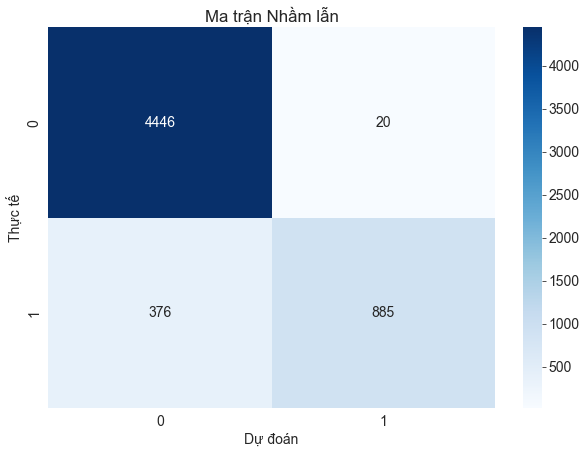

In [257]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

y_pred = dtc.predict(X_test_new)  # Dự đoán từ mô hình Decision Tree
cm = confusion_matrix(y_test, y_pred)  # Tính toán ma trận nhầm lẫn

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận Nhầm lẫn')
plt.show()

In [260]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # average='binary' cho bài toán nhị phân
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# In ra các chỉ số
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9308538501833421
Precision: 0.9779005524861878
Recall: 0.7018239492466296
F1-Score: 0.817174515235457


In [265]:
feature_scores = pd.Series(dtc.feature_importances_, index=X_new.columns).sort_values(ascending=False)
a=feature_scores.reset_index()
a.columns = ['Feature', 'Importance']

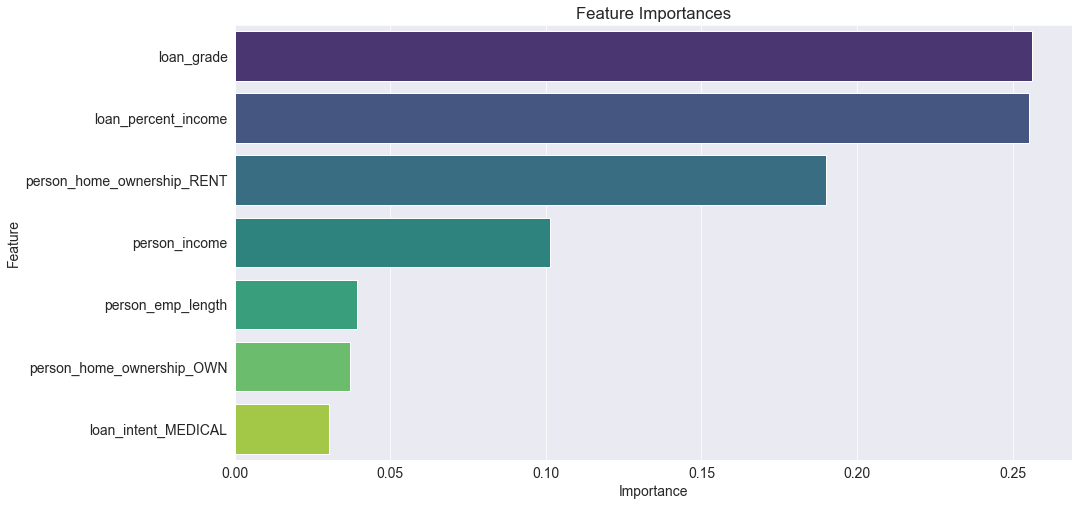

In [267]:
a = a[a['Importance'] > a.Importance.mean()]
plt.figure(figsize=(15, 8))
sns.barplot(data=a, x='Importance', y='Feature', orient='h', palette='viridis')  # Chú ý: x và y ngược lại
plt.title('Feature Importances')
plt.show()